In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
calender=pd.read_csv('Data/calendar2.csv')

In [3]:
reviews=pd.read_csv('Data/reviews2.csv')

In [4]:
listing2=pd.read_csv('Data/listing2.csv')

//anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Calender

 ### listing summary for Airbnbs in Toronto

In [5]:
print('We have', calender.date.nunique(), 'days and', calender.listing_id.nunique(), 'unique listings in the calendar data.')

We have 366 days and 23398 unique listings in the calendar data.


In [6]:
calender.date.min(), calender.date.max()

('2020-02-14', '2021-02-13')

In [7]:
#Overall calender data covers an entrie year time frame..so from Feb14 2020 to Feb13 2021

In [8]:
calender.isnull().sum()

listing_id        0
date              0
available         0
price             6
adjusted_price    6
minimum_nights    2
maximum_nights    2
dtype: int64

In [9]:
calender.isna

<bound method DataFrame.isna of          listing_id        date available    price adjusted_price  \
0              1419  2020-02-14         f  $469.00        $469.00   
1              1419  2020-02-15         f  $469.00        $469.00   
2              1419  2020-02-16         f  $469.00        $469.00   
3              1419  2020-02-17         f  $469.00        $469.00   
4              1419  2020-02-18         f  $469.00        $469.00   
...             ...         ...       ...      ...            ...   
8540401    42275755  2021-02-08         f  $125.00        $125.00   
8540402    42275755  2021-02-09         f  $125.00        $125.00   
8540403    42275755  2021-02-10         f  $125.00        $125.00   
8540404    42275755  2021-02-11         f  $125.00        $125.00   
8540405    42275755  2021-02-12         f  $125.00        $125.00   

         minimum_nights  maximum_nights  
0                   4.0           730.0  
1                   4.0           730.0  
2            

In [10]:
#dropping missing values from dataset
calender.dropna()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1419,2020-02-14,f,$469.00,$469.00,4.0,730.0
1,1419,2020-02-15,f,$469.00,$469.00,4.0,730.0
2,1419,2020-02-16,f,$469.00,$469.00,4.0,730.0
3,1419,2020-02-17,f,$469.00,$469.00,4.0,730.0
4,1419,2020-02-18,f,$469.00,$469.00,4.0,730.0
...,...,...,...,...,...,...,...
8540401,42275755,2021-02-08,f,$125.00,$125.00,1.0,1125.0
8540402,42275755,2021-02-09,f,$125.00,$125.00,1.0,1125.0
8540403,42275755,2021-02-10,f,$125.00,$125.00,1.0,1125.0
8540404,42275755,2021-02-11,f,$125.00,$125.00,1.0,1125.0


In [11]:
calender.available.value_counts()

f    5571573
t    2968833
Name: available, dtype: int64

f(false) here means that a listing is not availabe/is booked, whereas t(true) means it is currently available

In [12]:
calender_new=calender[['date','available']]
calender_new['booking rate']=calender_new.available.map(lambda x:0 if x=='t' else 1)
calender_new=calender_new.groupby('date')['booking rate'].mean().reset_index()
calender_new['date']=pd.to_datetime(calender_new['date'])

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


//anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


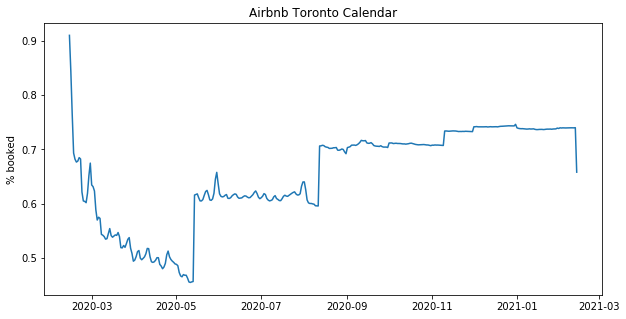

In [13]:
plt.figure(figsize=(10,5))
plt.plot(calender_new['date'], calender_new['booking rate'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% booked')
plt.show();


In [14]:
calender.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1419,2020-02-14,f,$469.00,$469.00,4.0,730.0
1,1419,2020-02-15,f,$469.00,$469.00,4.0,730.0
2,1419,2020-02-16,f,$469.00,$469.00,4.0,730.0
3,1419,2020-02-17,f,$469.00,$469.00,4.0,730.0
4,1419,2020-02-18,f,$469.00,$469.00,4.0,730.0


In [15]:
#Convert date string to datetime
dates=calender['date']

In [16]:
#We need day of week......
calender['datetime'] = calender['date'].astype('datetime64[ns]') 
calender['dayofWeek'] =calender['datetime'].dt.dayofweek

In [17]:
calender.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,datetime,dayofWeek
0,1419,2020-02-14,f,$469.00,$469.00,4.0,730.0,2020-02-14,4
1,1419,2020-02-15,f,$469.00,$469.00,4.0,730.0,2020-02-15,5
2,1419,2020-02-16,f,$469.00,$469.00,4.0,730.0,2020-02-16,6
3,1419,2020-02-17,f,$469.00,$469.00,4.0,730.0,2020-02-17,0
4,1419,2020-02-18,f,$469.00,$469.00,4.0,730.0,2020-02-18,1


In [18]:
calender['price'] = calender['price'].str.replace('$', '')
calender['price'] = calender['price'].str.replace(',', '')
calender['price'] = calender['price'].astype(float)
#calender['price'].astype('str')
#calender['price'].astype('str')
#calender['date'] = pd.to_datetime(calender['date'])

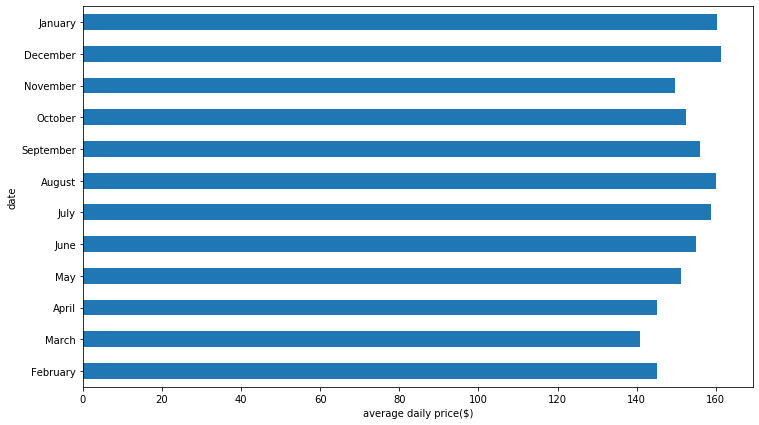

In [19]:
calender['date'] = pd.to_datetime(calender['date'])
mean_of_month = calender.groupby(calender['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average daily price($)');

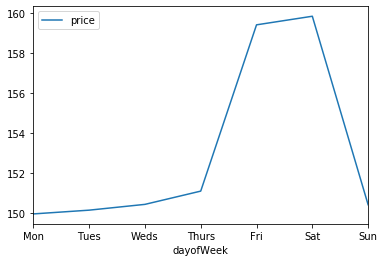

In [20]:
calender['dayofWeek']=calender.date.dt.weekday_name
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calender[['dayofWeek','price']]
price_week = calender.groupby(['dayofWeek']).mean().reindex(days)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.drop('minimum_nights', axis=1, inplace=True)
price_week.drop('maximum_nights', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

# Listing Dataset

In [21]:
listing2['price'] = listing2['price'].str.replace('$', '')
listing2['price'] = listing2['price'].str.replace(',', '')
listing2['price'] = listing2['price'].astype(float)

listing2['cleaning_fee'] = listing2['cleaning_fee'].str.replace('$', '')
listing2['cleaning_fee'] = listing2['cleaning_fee'].str.replace(',', '')
listing2['cleaning_fee'] = listing2['cleaning_fee'].astype(float)

In [22]:
#Removing listings/ outliers which have 0$ price
listing2.loc[listing2['price'] == 0]['price'].count()

3

In [23]:
listing2[listing2.price!= 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200214161839,2020-02-14,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.13
1,8077,https://www.airbnb.com/rooms/8077,20200214161839,2020-02-15,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.32
2,12604,https://www.airbnb.com/rooms/12604,20200214161839,2020-02-14,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200214161839,2020-02-14,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.84
4,26654,https://www.airbnb.com/rooms/26654,20200214161839,2020-02-14,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,There's a reason they call it the Entertainmen...,...,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23393,42279466,https://www.airbnb.com/rooms/42279466,20200214161839,2020-02-14,Luxurious modern condo room,This North York neighborhood enjoys access to ...,NaN,This North York neighborhood enjoys access to ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
23394,42280836,https://www.airbnb.com/rooms/42280836,20200214161839,2020-02-14,Cozy House in North York,NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
23395,42281530,https://www.airbnb.com/rooms/42281530,20200214161839,2020-02-15,Your one stopover to a chilled apartment.,NaN,NaN,NaN,none,NaN,...,t,f,flexible,f,f,1,0,1,0,NaN
23396,42282147,https://www.airbnb.com/rooms/42282147,20200214161839,2020-02-14,Traveller’s spot,NaN,NaN,NaN,none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,0,0,1,NaN


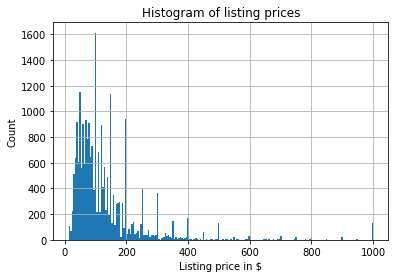

In [24]:

listing2.loc[(listing2.price <= 1000) & (listing2.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

# Price vs Neighbourhood

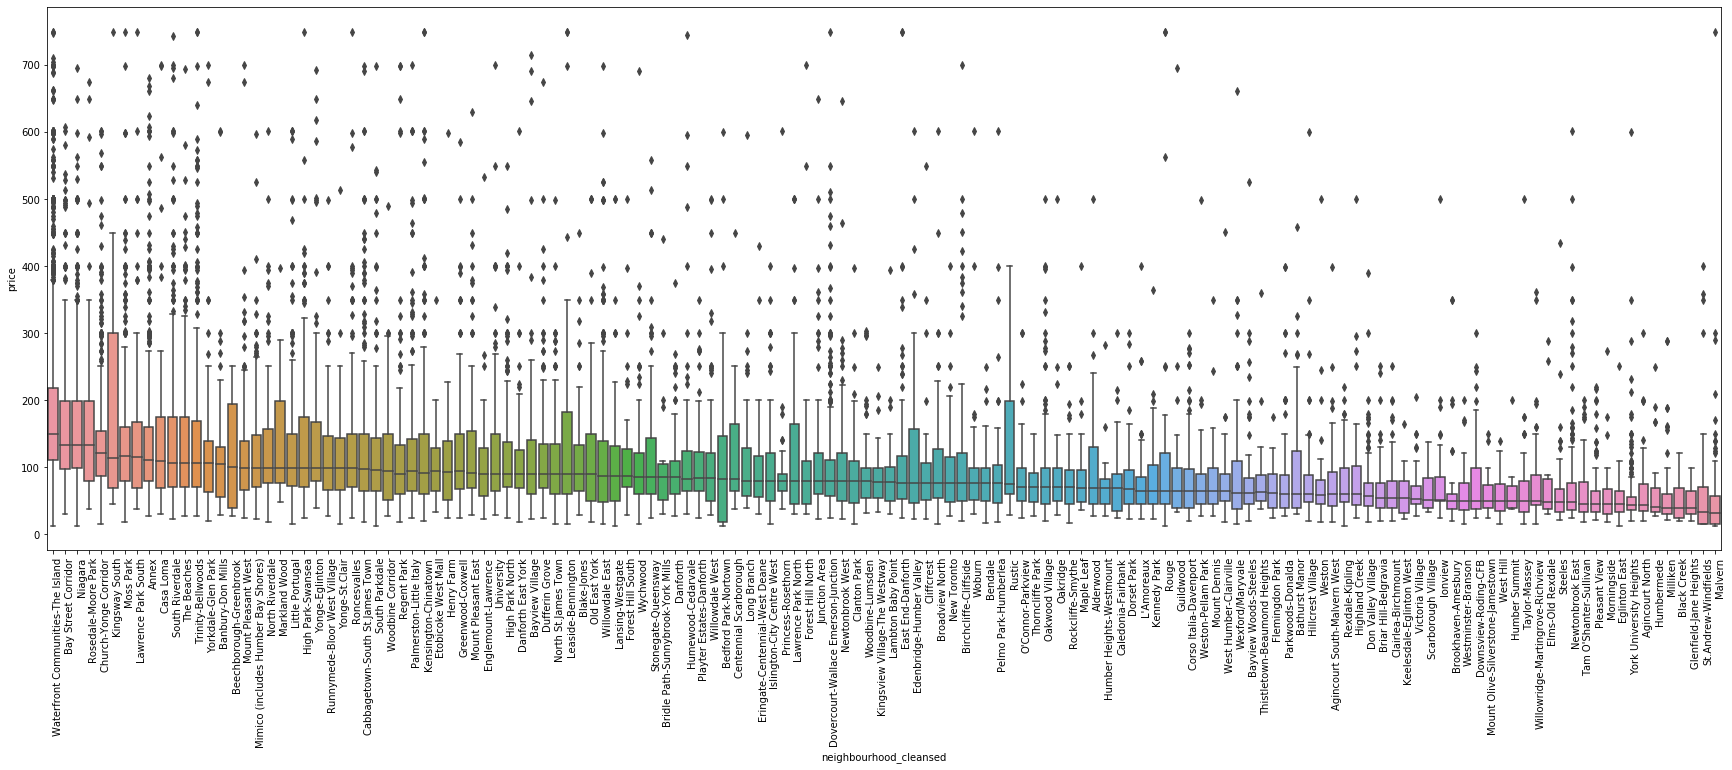

In [25]:
sorted_price = listing2.loc[(listing2.price <= 1000) & (listing2.price > 0)]\
                    .groupby(listing2['neighbourhood_cleansed'])['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

fig_dims = (30,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(y='price', x='neighbourhood_cleansed', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)], 
            order=sorted_price)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='left')

plt.show();

# Host vs Price

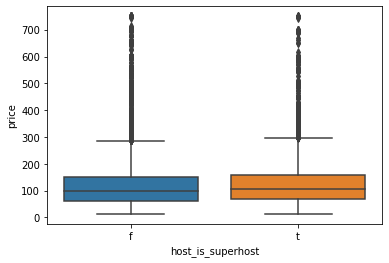

In [26]:
#host is superhost
sns.boxplot(y='price', x='host_is_superhost', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)])
plt.show();

# Price vs. Property Type

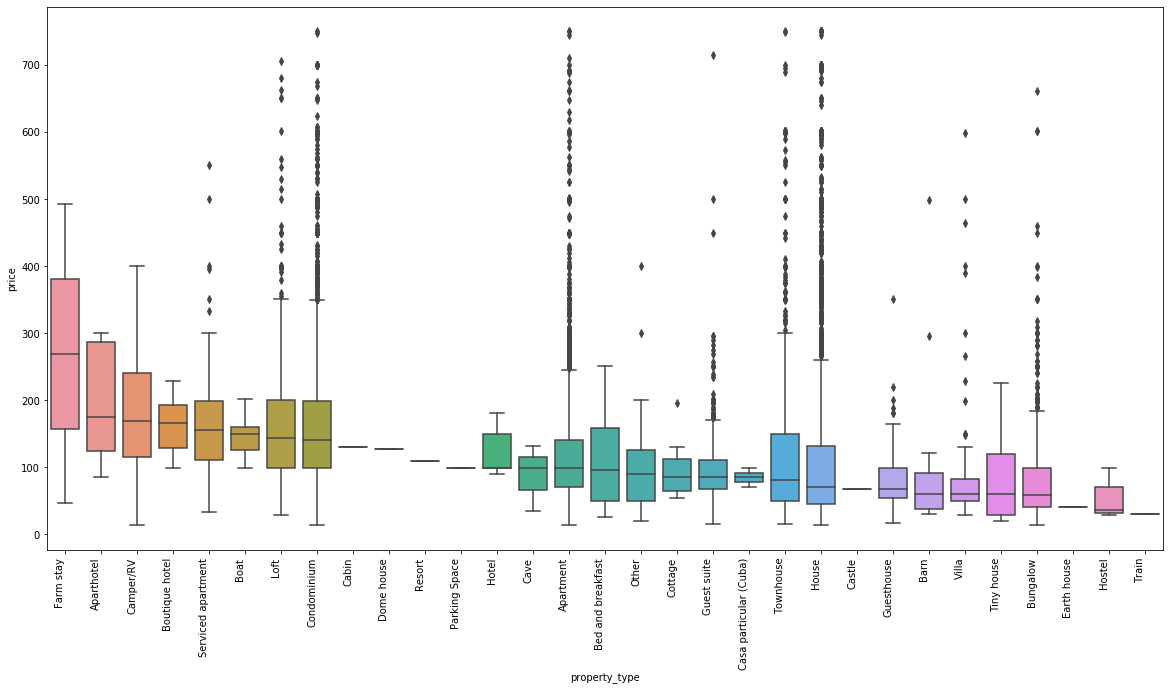

In [27]:
sorted_price = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(y='price', x='property_type', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)], order=sorted_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

In [28]:
listing2.property_type.value_counts()#Only keep Apartment,Condominum,House,Townhouse,Guest suite,Bungaloe, and Loft

Apartment                 6668
Condominium               6603
House                     6256
Townhouse                 1031
Guest suite                997
Bungalow                   829
Loft                       440
Guesthouse                 122
Villa                      106
Serviced apartment          99
Boutique hotel              66
Bed and breakfast           42
Other                       42
Hostel                      21
Hotel                       15
Tiny house                  13
Barn                        11
Cottage                      7
Aparthotel                   7
Boat                         5
Camper/RV                    4
Cave                         3
Farm stay                    2
Casa particular (Cuba)       2
Cabin                        1
Train                        1
Earth house                  1
Resort                       1
Castle                       1
Parking Space                1
Dome house                   1
Name: property_type, dtype: int64

In [29]:
# Only keep property_type listings "Apartment","Condominium","House","Townhouse","Guest suite","Bungalow","Loft"
lists=["Apartment","Condominium","House","Townhouse","Guest suite","Bungalow","Loft"]
listing2=listing2.loc[listing2['property_type'].isin(lists)]
listing2.reset_index()

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1419,https://www.airbnb.com/rooms/1419,20200214161839,2020-02-14,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.13
1,1,8077,https://www.airbnb.com/rooms/8077,20200214161839,2020-02-15,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.32
2,2,12604,https://www.airbnb.com/rooms/12604,20200214161839,2020-02-14,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,...,f,f,moderate,f,f,1,0,1,0,NaN
3,3,23691,https://www.airbnb.com/rooms/23691,20200214161839,2020-02-14,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.84
4,4,26654,https://www.airbnb.com/rooms/26654,20200214161839,2020-02-14,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,...,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22819,23393,42279466,https://www.airbnb.com/rooms/42279466,20200214161839,2020-02-14,Luxurious modern condo room,This North York neighborhood enjoys access to ...,NaN,This North York neighborhood enjoys access to ...,none,...,f,f,flexible,f,f,1,0,1,0,NaN
22820,23394,42280836,https://www.airbnb.com/rooms/42280836,20200214161839,2020-02-14,Cozy House in North York,NaN,NaN,NaN,none,...,f,f,flexible,f,f,1,1,0,0,NaN
22821,23395,42281530,https://www.airbnb.com/rooms/42281530,20200214161839,2020-02-15,Your one stopover to a chilled apartment.,NaN,NaN,NaN,none,...,t,f,flexible,f,f,1,0,1,0,NaN
22822,23396,42282147,https://www.airbnb.com/rooms/42282147,20200214161839,2020-02-14,Traveller’s spot,NaN,NaN,NaN,none,...,t,f,strict_14_with_grace_period,f,f,1,0,0,1,NaN


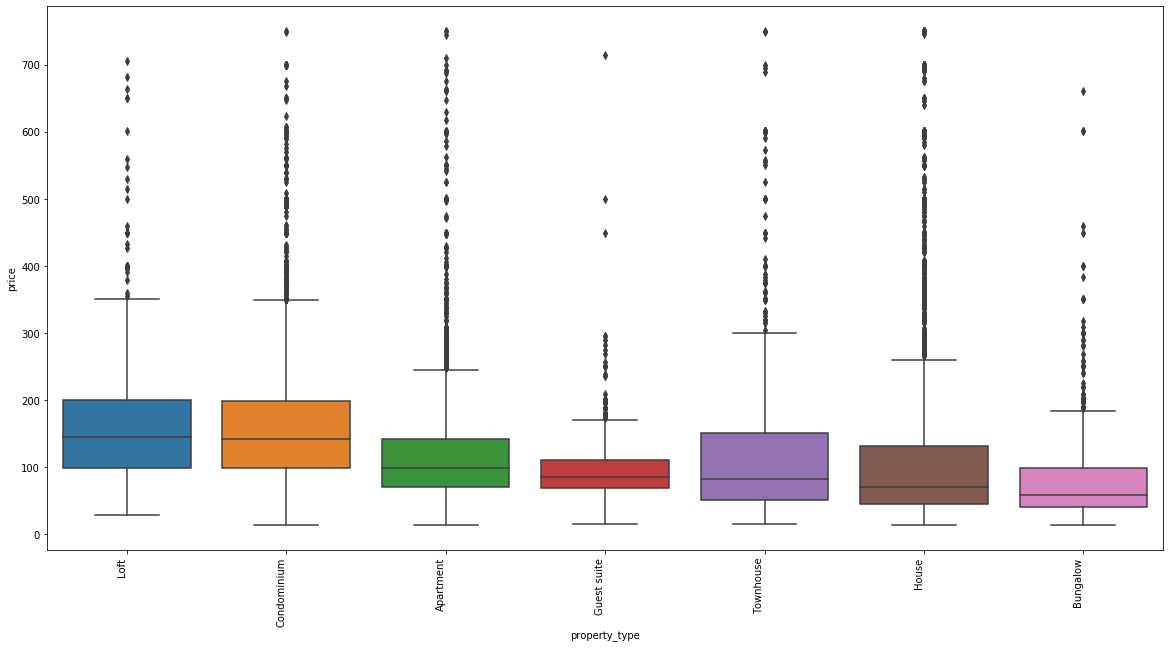

In [30]:
sorted_price = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(y='price', x='property_type', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)], order=sorted_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

# Price vs RoomType

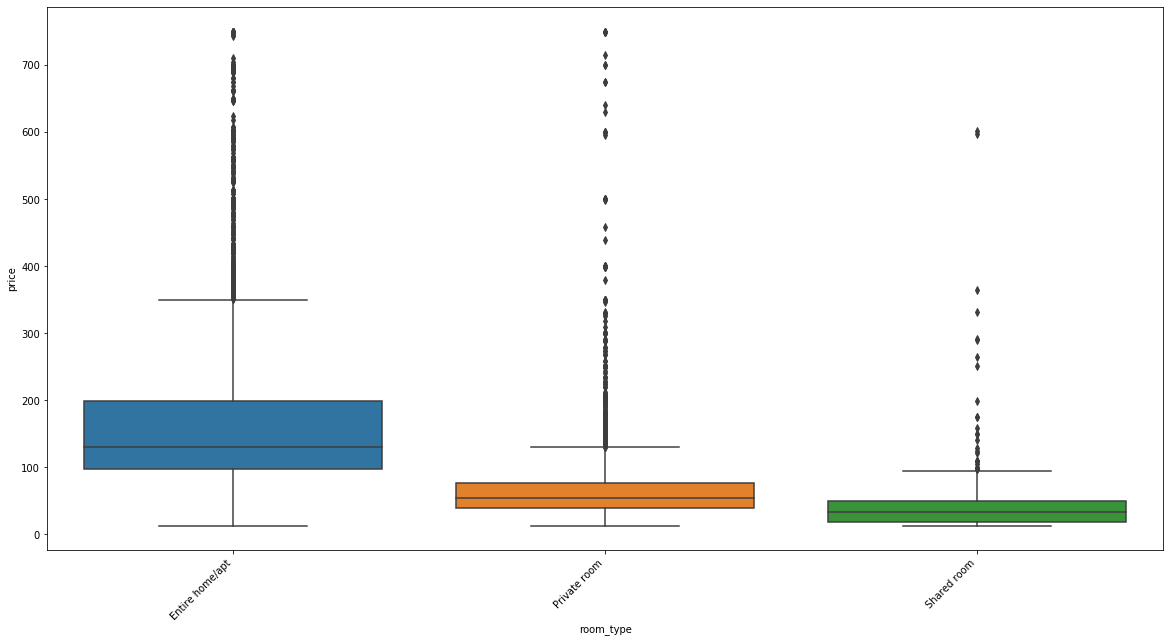

In [31]:
sorted_price = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(y='price', x='room_type', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)], order=sorted_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [32]:
listing2.room_type.value_counts()

Entire home/apt    14810
Private room        7609
Shared room          405
Name: room_type, dtype: int64

# Price vs Room Type

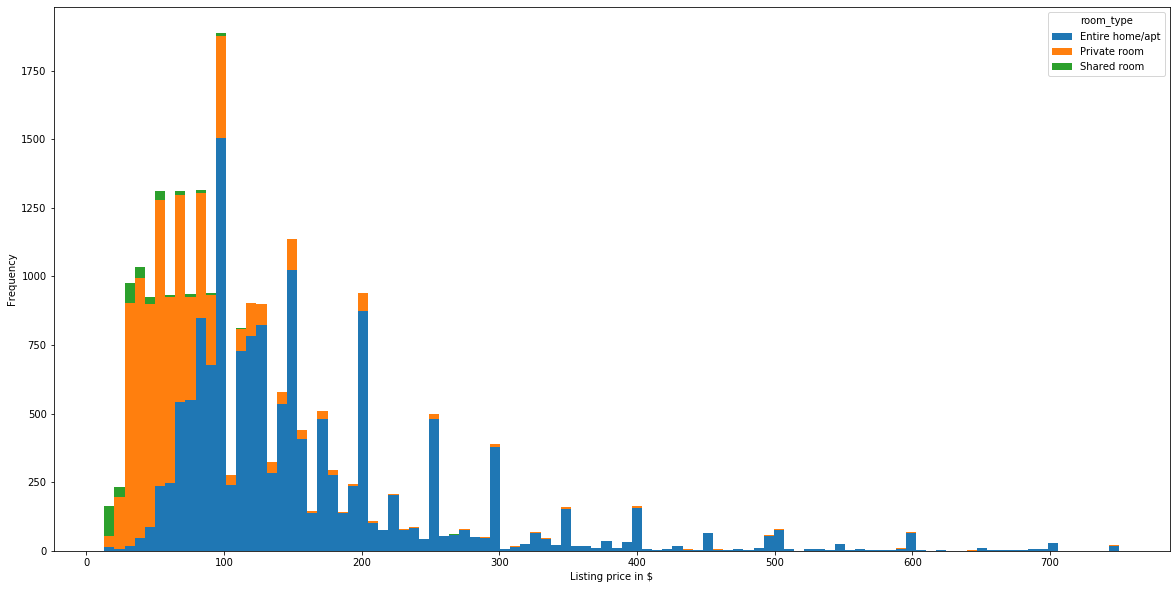

In [33]:
listing2.loc[(listing2.price <= 750) & (listing2.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100,figsize=(20,10))
plt.xlabel('Listing price in $');

# Price vs BedType

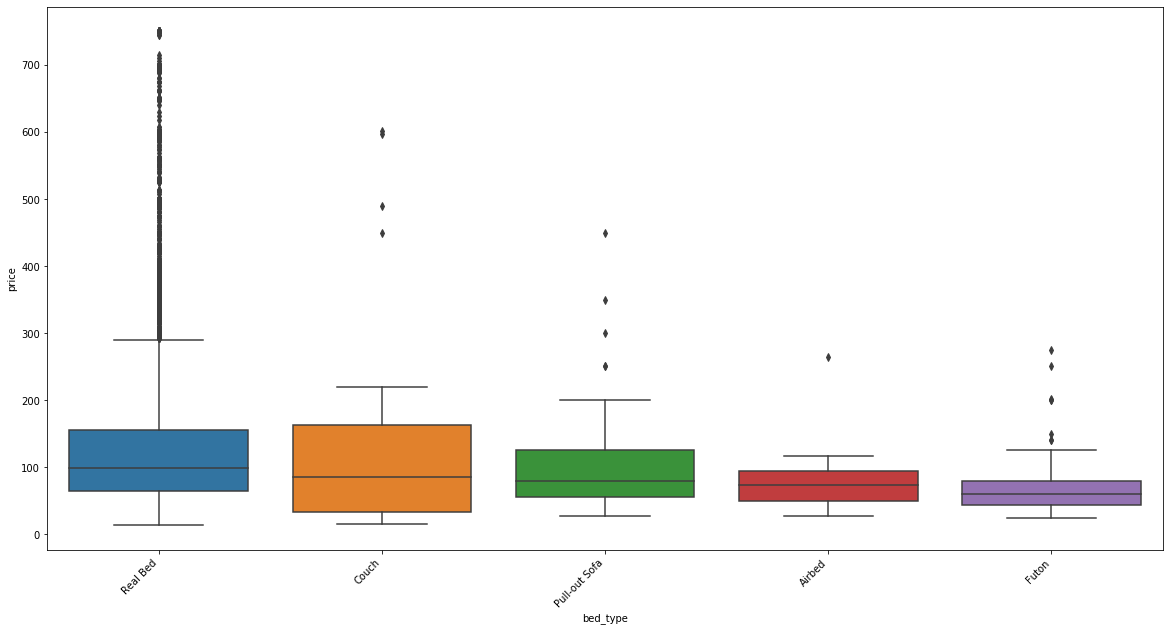

In [34]:
sorted_price = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y='price', x='bed_type', data=listing2.loc[(listing2.price <= 750) & (listing2.price > 0)], order=sorted_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

# Amenities

In [35]:
listing2.amenities=listing2.amenities.str.replace("[{}]", "").str.replace('"', "")

In [36]:
listing2['amenities'].head()

0    TV,Internet,Wifi,Air conditioning,Kitchen,Indo...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
2    Internet,Wifi,Pets live on this property,Cat(s...
3    Internet,Wifi,Air conditioning,Kitchen,Free pa...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Whe...
Name: amenities, dtype: object

In [37]:
#Popular amenities
listing2[['name','amenities']]

,name,amenities
0,Beautiful home in amazing area!,"TV,Internet,Wifi,Air conditioning,Kitchen,Indo..."
1,Downtown Harbourfront Private Room,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo..."
2,Seaton Village Parlour Bedroom,"Internet,Wifi,Pets live on this property,Cat(s..."
3,Queen Bedroom close to downtown,"Internet,Wifi,Air conditioning,Kitchen,Free pa..."
4,World Class downtown @CN Tower Theatre MTCC ga...,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe..."
...,...,...
23393,Luxurious modern condo room,"TV,Wifi,Air conditioning,Kitchen,Gym,Heating,W..."
23394,Cozy House in North York,"Wifi,Air conditioning,Kitchen,Free parking on ..."
23395,Your one stopover to a chilled apartment.,"Wifi,Air conditioning,Pool,Kitchen,Free parkin..."
23396,Traveller’s spot,"Wifi,Kitchen,Smoking allowed,Elevator,Heating,..."


# Prive vs Amenities


In [38]:

#amenities = np.unique(np.concatenate(listing2['amenities'].map(lambda amns: amns.split(","))))


#amenity_prices = [(amn, listing2[listing2['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]

#amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

#amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')



#ax = plt.gca()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
#plt.show();

# Price vs Num of Beds in listing

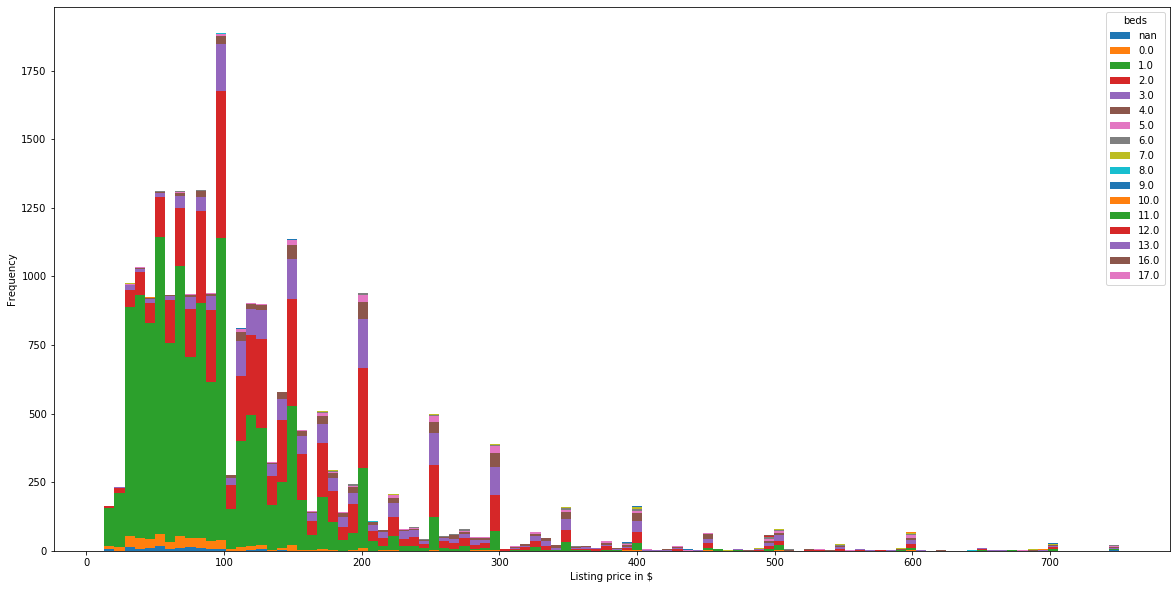

In [39]:
listing2.loc[(listing2.price <= 750) & (listing2.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100,figsize=(20,10))
plt.xlabel('Listing price in $');

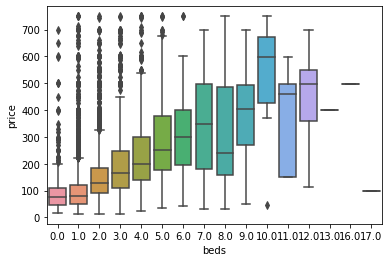

In [40]:
figsize=(20,10)
sns.boxplot(y='price', x='beds', data = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)])
plt.show();

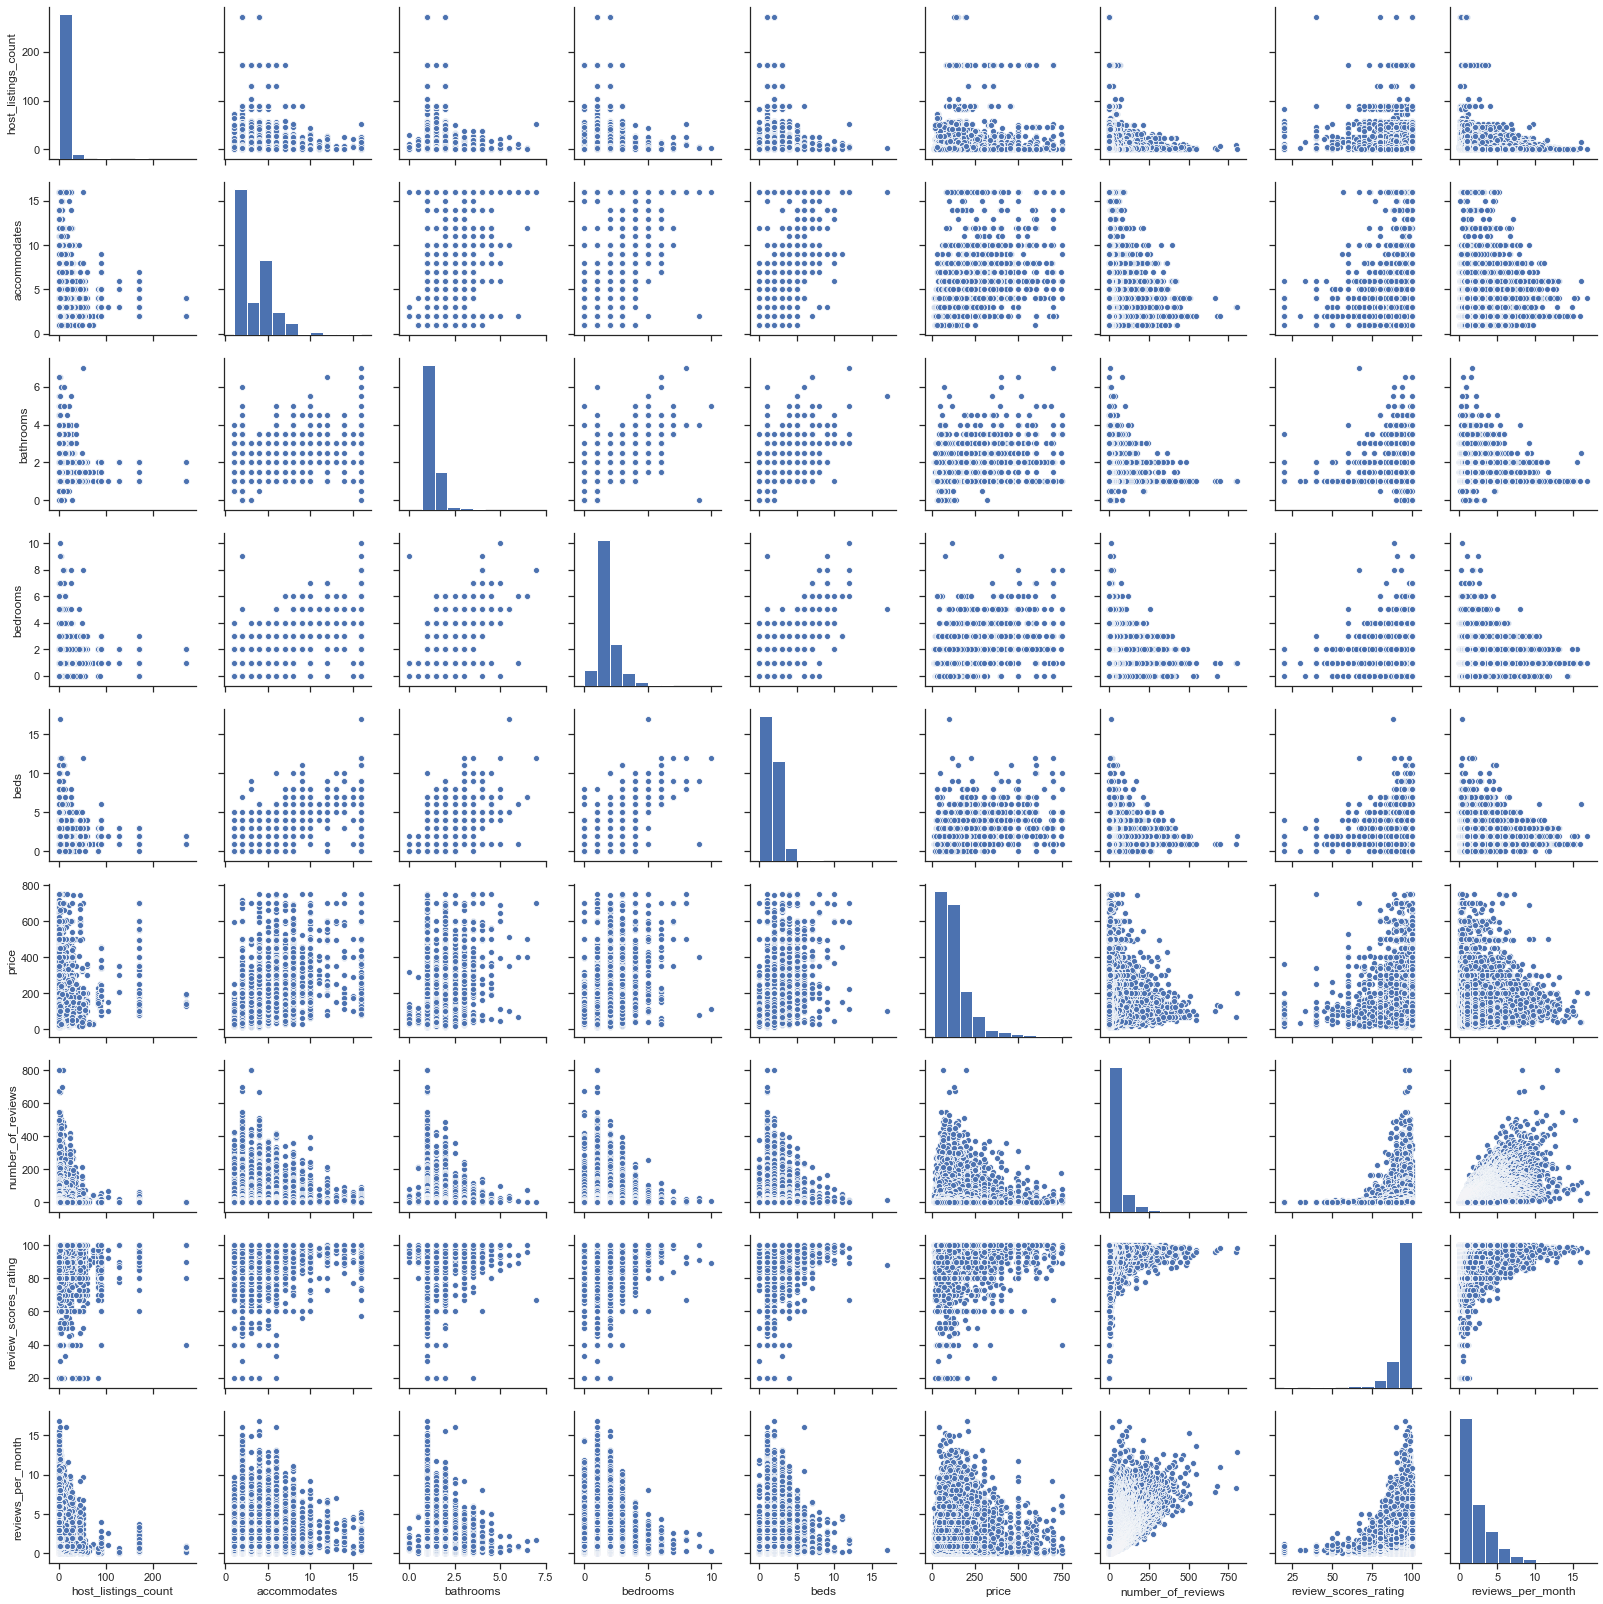

In [41]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month','host_response_rate']

sns.set(style="ticks", color_codes=True)
sns.pairplot(listing2.loc[(listing2.price <= 750) & (listing2.price > 0)][col].dropna())
plt.show();

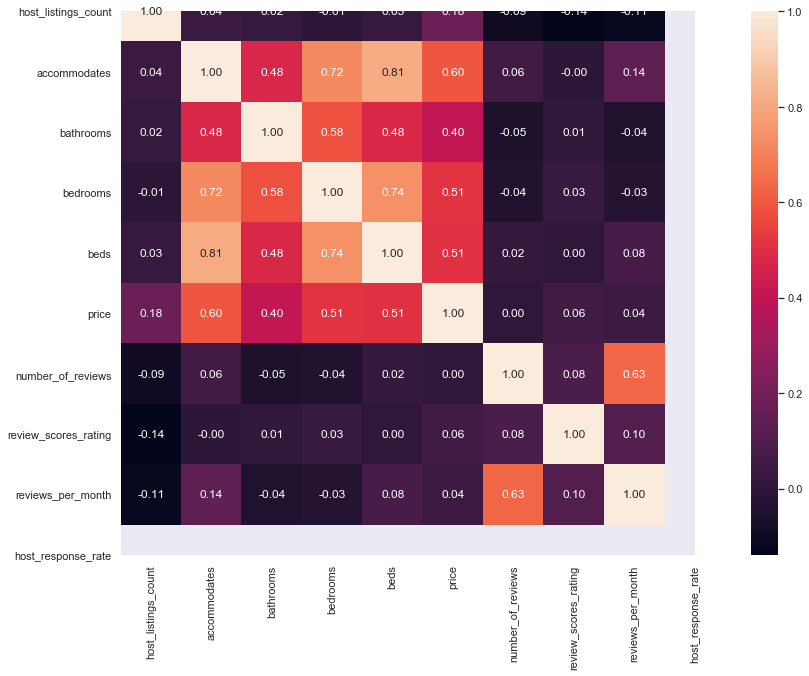

<Figure size 432x288 with 0 Axes>

In [42]:
corr = listing2.loc[(listing2.price <= 750) & (listing2.price > 0)][col].dropna().corr()
plt.figure(figsize = (20,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();
plt.savefig('correlation_matrix.png')

In [43]:
sorted(listing2) #view all the columns in the dataset

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [44]:
listing2.review_scores_rating.value_counts()
#listing2.review_scores_rating.describe()

100.0    4967
98.0     1712
97.0     1492
96.0     1425
95.0     1184
99.0     1175
93.0     1043
94.0      801
90.0      782
80.0      590
92.0      561
91.0      450
87.0      299
89.0      282
88.0      280
85.0      172
60.0      158
86.0      143
84.0      130
83.0      116
70.0       70
73.0       58
82.0       52
20.0       49
75.0       44
40.0       35
81.0       34
76.0       28
78.0       26
67.0       26
77.0       23
50.0       17
74.0       11
72.0       10
71.0       10
65.0        9
53.0        8
68.0        7
79.0        7
69.0        5
64.0        5
63.0        4
47.0        4
55.0        3
52.0        2
56.0        2
66.0        2
57.0        2
30.0        1
45.0        1
46.0        1
48.0        1
33.0        1
Name: review_scores_rating, dtype: int64

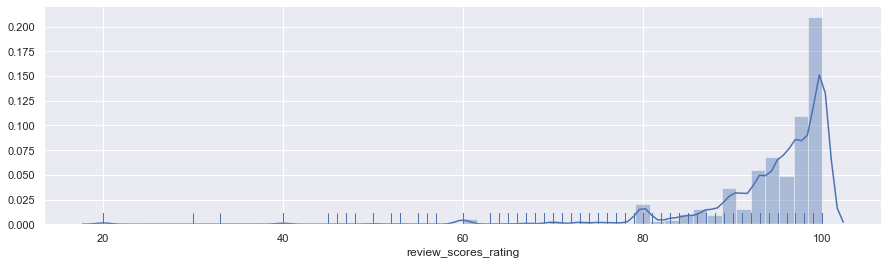

In [45]:
plt.figure(figsize=(15,4))
sns.distplot(listing2.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [46]:
listing2.review_scores_rating.describe()

count    18320.000000
mean        94.241485
std          8.380465
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [47]:
sub=listing2[['price','id','name','property_type','host_listings_count','host_is_superhost','instant_bookable',
 'is_location_exact','host_identity_verified', 'host_has_profile_pic','requires_license',
 'neighbourhood_cleansed','host_response_rate','cleaning_fee','security_deposit','accommodates','amenities','cancellation_policy','bathrooms',
 'bed_type',
 'bedrooms','room_type',
 'beds',]]
#

In [48]:
sub.bed_type.value_counts()


Real Bed         22579
Futon              119
Pull-out Sofa       70
Airbed              30
Couch               26
Name: bed_type, dtype: int64

In [49]:
sub.cleaning_fee.value_counts()

50.0     1732
60.0     1081
20.0     1044
100.0    1040
30.0      991
         ... 
143.0       1
360.0       1
152.0       1
238.0       1
164.0       1
Name: cleaning_fee, Length: 219, dtype: int64

In [50]:
sub.neighbourhood_cleansed.value_counts()

Waterfront Communities-The Island    4284
Niagara                              1021
Annex                                 826
Church-Yonge Corridor                 697
Bay Street Corridor                   681
                                     ... 
Black Creek                            16
Humber Summit                          15
Elms-Old Rexdale                       14
Beechborough-Greenbrook                10
Markland Wood                           9
Name: neighbourhood_cleansed, Length: 140, dtype: int64

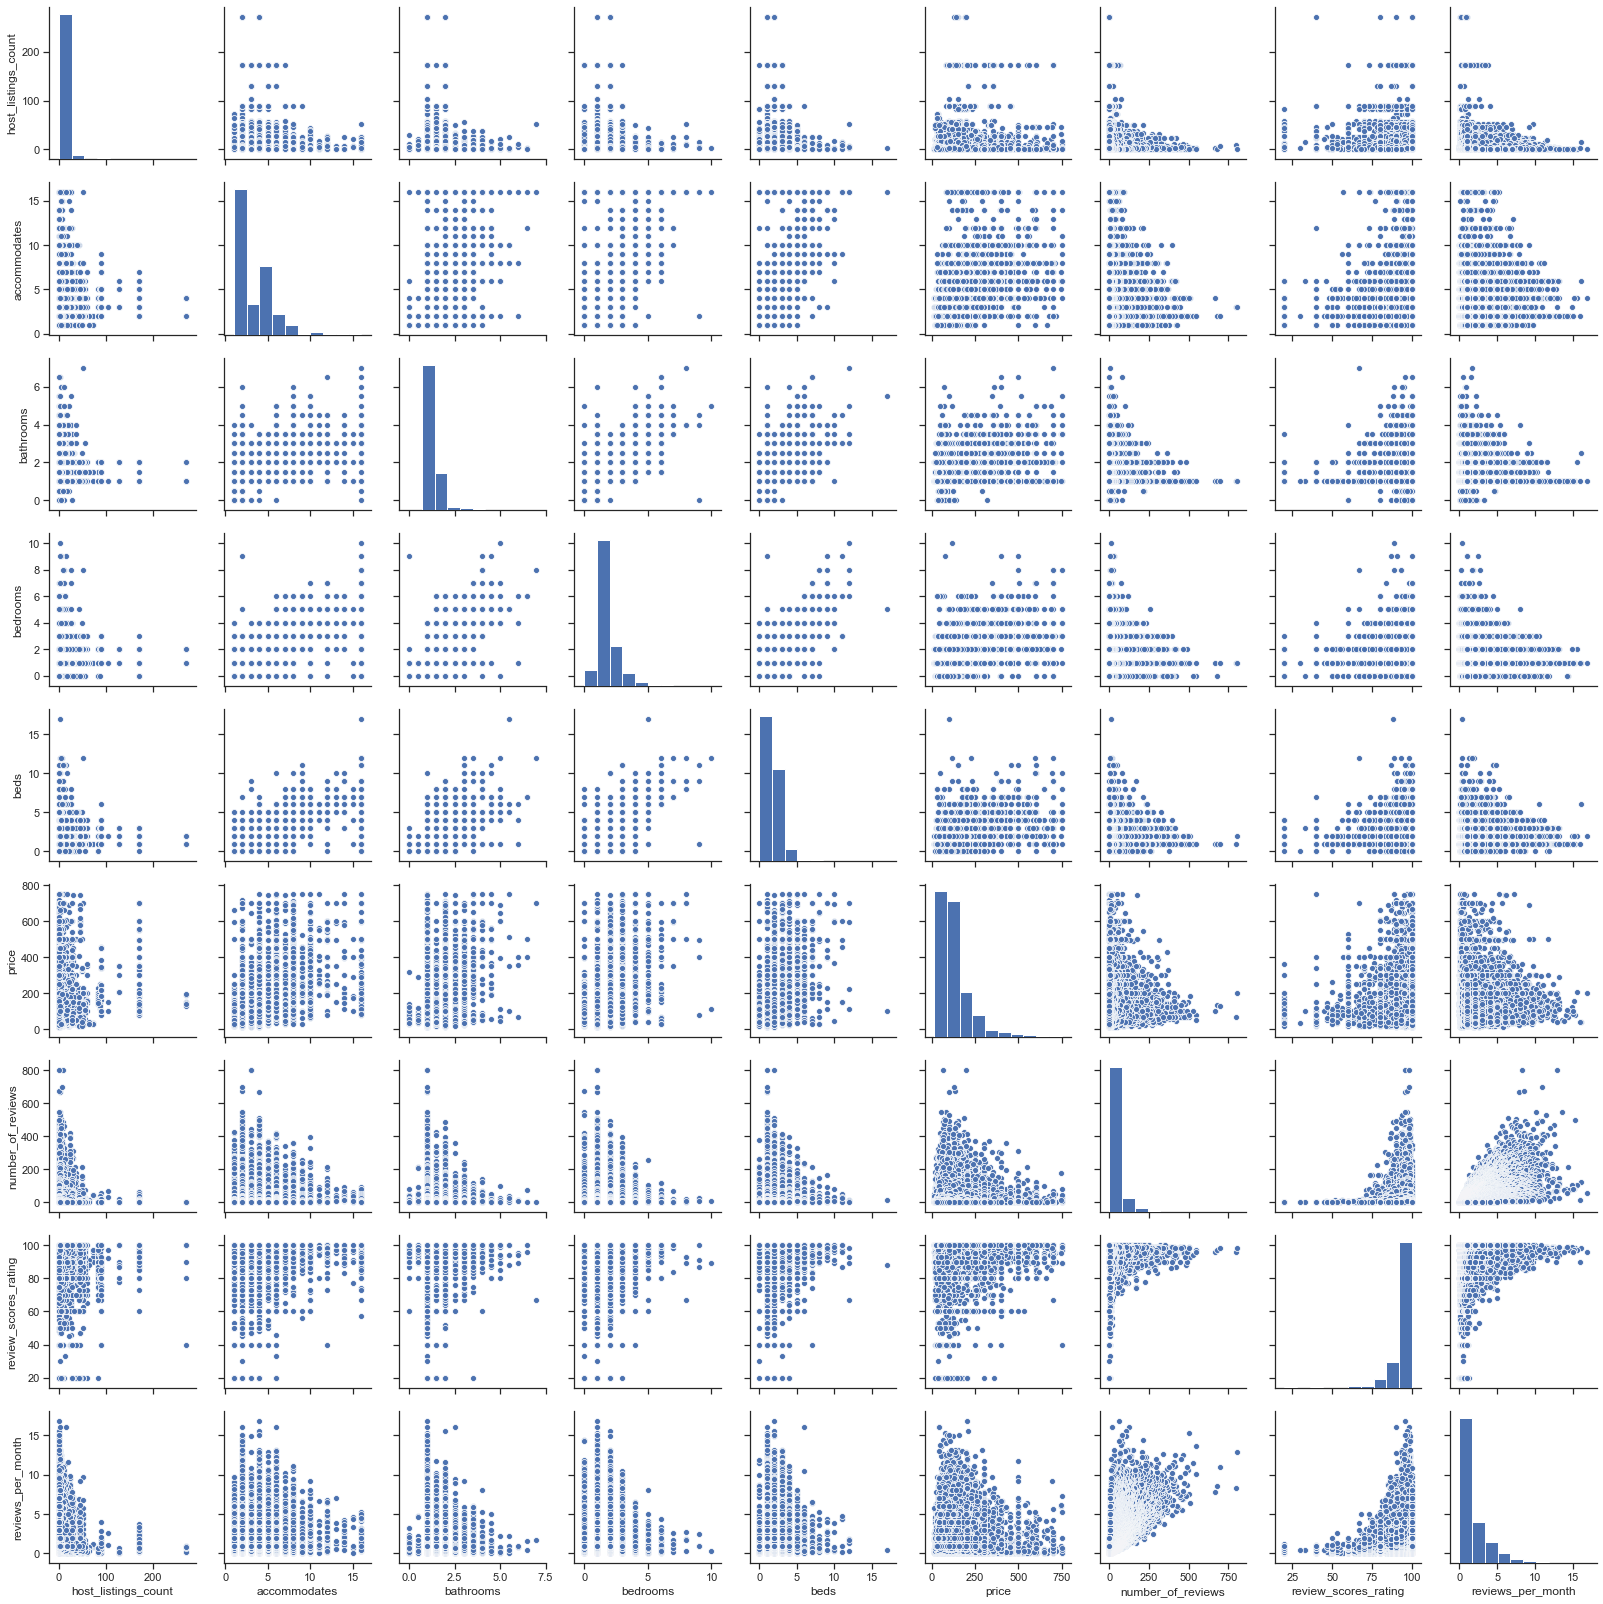

In [51]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']




sns.set(style="ticks", color_codes=True)
sns.pairplot(listing2.loc[(listing2.price <= 750) & (listing2.price > 0)][col].dropna())
plt.show();


In [52]:
sub=sub.reset_index()
del sub['index']
sub

,price,id,name,property_type,host_listings_count,host_is_superhost,instant_bookable,is_location_exact,host_identity_verified,host_has_profile_pic,...,cleaning_fee,security_deposit,accommodates,amenities,cancellation_policy,bathrooms,bed_type,bedrooms,room_type,beds
0,469.0,1419,Beautiful home in amazing area!,House,1.0,f,f,f,t,t,...,150.0,"$1,000.00",10,"TV,Internet,Wifi,Air conditioning,Kitchen,Indo...",strict_14_with_grace_period,3.0,Real Bed,5.0,Entire home/apt,7.0
1,99.0,8077,Downtown Harbourfront Private Room,Apartment,2.0,f,t,t,f,t,...,NaN,"$2,651.00",2,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",strict_14_with_grace_period,1.5,Real Bed,1.0,Private room,1.0
2,66.0,12604,Seaton Village Parlour Bedroom,House,1.0,f,f,t,t,t,...,27.0,$133.00,1,"Internet,Wifi,Pets live on this property,Cat(s...",moderate,1.5,Pull-out Sofa,1.0,Private room,1.0
3,72.0,23691,Queen Bedroom close to downtown,House,2.0,f,t,t,t,t,...,0.0,$0.00,3,"Internet,Wifi,Air conditioning,Kitchen,Free pa...",strict_14_with_grace_period,1.0,Real Bed,1.0,Private room,1.0
4,199.0,26654,World Class downtown @CN Tower Theatre MTCC ga...,Condominium,7.0,f,f,t,t,t,...,51.0,$300.00,5,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",strict_14_with_grace_period,1.0,Real Bed,1.0,Entire home/apt,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22819,36.0,42279466,Luxurious modern condo room,Apartment,0.0,f,f,t,f,t,...,NaN,NaN,1,"TV,Wifi,Air conditioning,Kitchen,Gym,Heating,W...",flexible,1.0,Real Bed,1.0,Private room,NaN
22820,89.0,42280836,Cozy House in North York,House,0.0,f,f,f,f,t,...,NaN,NaN,5,"Wifi,Air conditioning,Kitchen,Free parking on ...",flexible,1.0,Real Bed,4.0,Entire home/apt,NaN
22821,34.0,42281530,Your one stopover to a chilled apartment.,Apartment,0.0,f,t,t,f,t,...,NaN,NaN,2,"Wifi,Air conditioning,Pool,Kitchen,Free parkin...",flexible,1.0,Real Bed,1.0,Private room,0.0
22822,30.0,42282147,Traveller’s spot,Apartment,1.0,f,t,f,f,t,...,NaN,NaN,2,"Wifi,Kitchen,Smoking allowed,Elevator,Heating,...",strict_14_with_grace_period,1.0,Real Bed,1.0,Shared room,1.0


In [53]:
cols=['host_is_superhost','instant_bookable',
 'is_location_exact','host_identity_verified','host_has_profile_pic']
for x in cols:
    sub[x] = sub[x].replace('f',0,regex=True)
    sub[x] = sub[x].replace('t',1,regex=True)

In [54]:
#Removing listing where price>$750
sub = sub.loc[(sub.price <= 750) & (sub.price > 0)]

In [55]:
sorted(sub)

['accommodates',
 'amenities',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'id',
 'instant_bookable',
 'is_location_exact',
 'name',
 'neighbourhood_cleansed',
 'price',
 'property_type',
 'requires_license',
 'room_type',
 'security_deposit']

In [56]:
#save model_data

In [57]:
sub.to_csv('Data/sub.csv')

In [58]:
sub

,price,id,name,property_type,host_listings_count,host_is_superhost,instant_bookable,is_location_exact,host_identity_verified,host_has_profile_pic,...,cleaning_fee,security_deposit,accommodates,amenities,cancellation_policy,bathrooms,bed_type,bedrooms,room_type,beds
0,469.0,1419,Beautiful home in amazing area!,House,1.0,0.0,0,0,1.0,1.0,...,150.0,"$1,000.00",10,"TV,Internet,Wifi,Air conditioning,Kitchen,Indo...",strict_14_with_grace_period,3.0,Real Bed,5.0,Entire home/apt,7.0
1,99.0,8077,Downtown Harbourfront Private Room,Apartment,2.0,0.0,1,1,0.0,1.0,...,NaN,"$2,651.00",2,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",strict_14_with_grace_period,1.5,Real Bed,1.0,Private room,1.0
2,66.0,12604,Seaton Village Parlour Bedroom,House,1.0,0.0,0,1,1.0,1.0,...,27.0,$133.00,1,"Internet,Wifi,Pets live on this property,Cat(s...",moderate,1.5,Pull-out Sofa,1.0,Private room,1.0
3,72.0,23691,Queen Bedroom close to downtown,House,2.0,0.0,1,1,1.0,1.0,...,0.0,$0.00,3,"Internet,Wifi,Air conditioning,Kitchen,Free pa...",strict_14_with_grace_period,1.0,Real Bed,1.0,Private room,1.0
4,199.0,26654,World Class downtown @CN Tower Theatre MTCC ga...,Condominium,7.0,0.0,0,1,1.0,1.0,...,51.0,$300.00,5,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",strict_14_with_grace_period,1.0,Real Bed,1.0,Entire home/apt,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22819,36.0,42279466,Luxurious modern condo room,Apartment,0.0,0.0,0,1,0.0,1.0,...,NaN,NaN,1,"TV,Wifi,Air conditioning,Kitchen,Gym,Heating,W...",flexible,1.0,Real Bed,1.0,Private room,NaN
22820,89.0,42280836,Cozy House in North York,House,0.0,0.0,0,0,0.0,1.0,...,NaN,NaN,5,"Wifi,Air conditioning,Kitchen,Free parking on ...",flexible,1.0,Real Bed,4.0,Entire home/apt,NaN
22821,34.0,42281530,Your one stopover to a chilled apartment.,Apartment,0.0,0.0,1,1,0.0,1.0,...,NaN,NaN,2,"Wifi,Air conditioning,Pool,Kitchen,Free parkin...",flexible,1.0,Real Bed,1.0,Private room,0.0
22822,30.0,42282147,Traveller’s spot,Apartment,1.0,0.0,1,0,0.0,1.0,...,NaN,NaN,2,"Wifi,Kitchen,Smoking allowed,Elevator,Heating,...",strict_14_with_grace_period,1.0,Real Bed,1.0,Shared room,1.0
